<a href="https://colab.research.google.com/github/matrixawesome/fods/blob/main/FoDS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIFE EXPECTANCY: DATA ANALYSIS**

The Global Health Observatory (GHO) by the World Health Organization (WHO) tracks global health data, including factors influencing life expectancy. The dataset, covering 193 countries, includes both health and economic data collected from WHO and the United Nations. For this project, data from 2000 to 2015 was used to analyze health trends, particularly focusing on the improvements in mortality rates, especially in developing nations.

The dataset consists of 22 columns and 2938 rows, with 20 predictor variables categorized into immunization, mortality, economic, and social factors.

**1. Categorical Features**
*   **Country**
*   **Status**: developed or developing status

**2. Numerical Features**
*   **Year**
*   **Life Expectancy**: life expectancy in age
*   **Adult Mortality**: adult mortality rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
*   **Infant Deaths**: number of infant deaths per 1000 population
*   **Alcohol**: alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
*   **Percentage Expenditure**: expenditure on health as a percentage of Gross Domestic Product per capita (%)
*   **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
*   **Measles**: number of reported cases per 1000 population
*   **BMI**: average body mass index of entire population
*   **Under Five Deaths**: number of under-five deaths per 1000 population
*   **Polio**: polio (Pol3) immunization coverage among 1-year-olds (%)
*   **Total Expenditure**: general government expenditure on health as a percentage of total government expenditure (%)
*   **Diphtheria**: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
*   **HIV/AIDS**: deaths per 1000 live births HIV/AIDS (0-4 years)
*   **GDP**: Gross Domestic Product per capita (in USD)
*   **Population**: population of the country
*   **Income Composition**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
*   **Schooling**: number of years of schooling

In [ ]:
!pip install xgboost ngboost scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, \
f1_score, precision_score, confusion_matrix, mean_absolute_error, mean_squared_error, \
r2_score, silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import pdist, cdist
import xgboost as xgb
import ngboost
from ngboost import NGBoost
from ngboost.distns import Normal
from scipy.stats import zscore
import warnings

warnings.filterwarnings("ignore")

In [ ]:
file_id = "1Hq3MeMwX0RRLcIbbvgXWaaLKWmZsVz-9"
url = f"https://drive.google.com/uc?id={file_id}"

# Load the CSV file
df = pd.read_csv(url).drop([' thinness  1-19 years', ' thinness 5-9 years'], axis=1)

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5


# **PREPROCESSING**

### **Note:**

Preprocessing steps vary significantly for different machine learning tasks, such as classification, clustering, and regression, due to the distinct nature of each task. We will specify the preprocessing steps for each task respectively.

In [ ]:
print(df.isna().sum())  # checking null values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
Income composition of resources    167
Schooling                          163
dtype: int64


# **1. CLASSIFICATION**

In the classification task, the goal is to classify whether the status of a country is developed or developing based on various features. The target variable is **Status**, which contains two classes: **developed** and **developing**.

## **1.1 PREPROCESSING**

The process begins by separating the features and the target variable into different dataframes. The target dataframe consists solely of the **Status** column, while the features dataframe includes all the other columns.

Next, preprocessing is performed to ensure the dataset is suitable for classification models. Missing values in the features are handled by imputing with the median, which ensures robustness against outliers. The only categorical variable in the dataset, **Country**, is encoded using One-Hot Encoding, transforming it into a numerical format. Additionally, all the features are scaled to normalize their ranges and ensure uniformity, especially for algorithms sensitive to feature magnitudes.

In [ ]:
# Convert column type from object to numeric

numeric_cols = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
                'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
                'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
                ' HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
                'Schooling']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Dropping the target variable (Status) from the dataframe

X = df.drop(columns=['Status']) #features
y = df['Status'] #target

In [ ]:
# Replacing null values using Simple Imputer

imputer = SimpleImputer(strategy='median')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

In [ ]:
# Encoding the categorical variables (Country)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_countries = encoder.fit_transform(X[['Country']])
encoded_country_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))

X = X.drop(columns=['Country'])
X = pd.concat([X.reset_index(drop=True), encoded_country_df.reset_index(drop=True)], axis=1)

# Scaling the features

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X_scaled = X[numeric_cols]

In [ ]:
# Test-train split (20-80)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1.2 CLASSIFICATION MODELS**

After preprocessing, the dataset is split into training and testing sets, with 80% for training and 20% for testing. The classification models are then trained on the training set and evaluated on the testing set to assess their performance.

In [ ]:
# Logistic Regression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Comparing model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Output the results
print(f"Logistic Regression model accuracy (in %): {accuracy * 100}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Logistic Regression model accuracy (in %): 96.42857142857143
Precision = 0.9657161020797386
Recall = 0.9642857142857143
F1 Score = 0.9647793997047728


In [ ]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Gaussian Naive Bayes model accuracy(in %): 99.65986394557824
Precision = 0.996667353810211
Recall = 0.9965986394557823
F1 Score = 0.9966125225600445


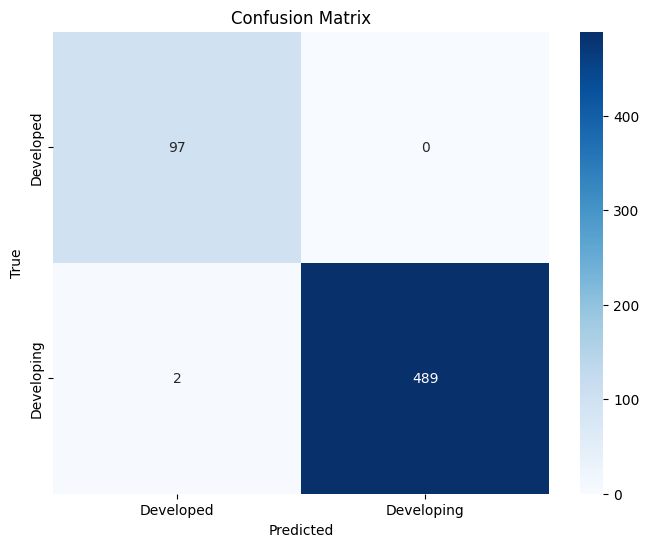

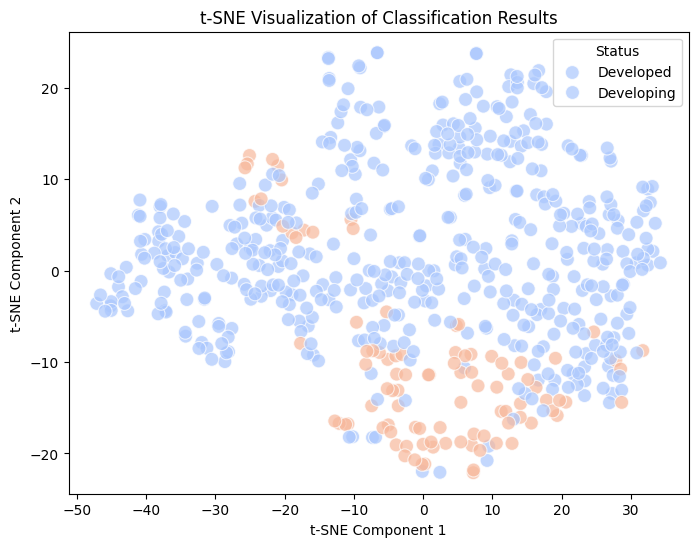

In [ ]:
# Confusion Matrix Visualization for Naive Bayes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Developed', 'Developing'], yticklabels=['Developed', 'Developing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Dimensionality Reduction with t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

# Plotting the 2D scatter plot of the data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette='coolwarm', s=100, alpha=0.7)
plt.title('t-SNE Visualization of Classification Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Status', labels=['Developed', 'Developing'])
plt.show()


In [ ]:
#KNN

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# comparing
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

KNN model accuracy(in %): 93.70748299319727
Precision = 0.9442583652397254
Recall = 0.9370748299319728
F1 Score = 0.9392605944722382


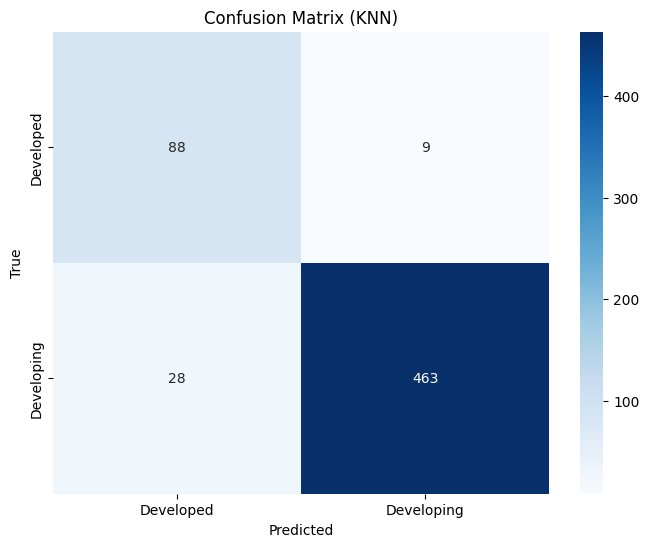

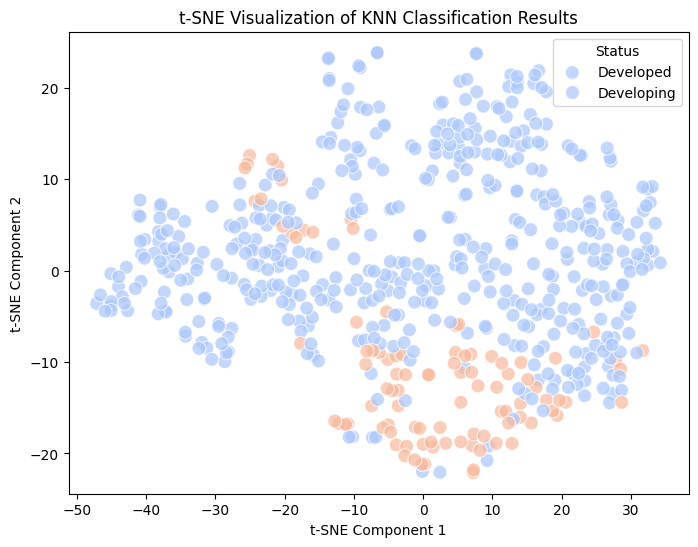

In [ ]:
# Confusion Matrix Visualization for KNN
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Developed', 'Developing'], yticklabels=['Developed', 'Developing'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Dimensionality Reduction with t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

# Plotting the 2D scatter plot of the data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette='coolwarm', s=100, alpha=0.7)
plt.title('t-SNE Visualization of KNN Classification Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Status', labels=['Developed', 'Developing'])
plt.show()


In [ ]:
# Linear SVM
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
yc_pred = clf.predict(X_test)

# comparing
print("linear SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")
print(f"F1 Score = {f1score:.2f}")

linear SVM model accuracy(in %): 93.70748299319727
Precision = 0.94
Recall = 0.94
F1 Score = 0.94


In [ ]:
#Kernel SVM

kernels = ['rbf', 'poly', 'sigmoid']

# Looping through each kernel type, train the model and print the results
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    # Create a Kernel SVM model with the current kernel
    ksvm = make_pipeline(StandardScaler(), SVC(kernel=kernel, gamma=0.1, C=10.0))

    # Fitting the model
    ksvm.fit(X_train, y_train)
    y_pred = ksvm.predict(X_test)

    # comparing
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1score = metrics.f1_score(y_test, y_pred, average='weighted')
    precision = metrics.precision_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1score}")


Kernel: rbf
Accuracy: 98.80952380952381%
Precision: 0.9882625741059476
Recall: 0.9880952380952381
F1 Score: 0.987914551793693

Kernel: poly
Accuracy: 100.0%
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Kernel: sigmoid
Accuracy: 87.58503401360545%
Precision: 0.8796174064031207
Recall: 0.8758503401360545
F1 Score: 0.8775664846880198


In [ ]:
#Decision Tree

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# comparing
print("Decision Tree model accuracy (in %):", metrics.accuracy_score(y_test, y_pred)*100)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Decision Tree model accuracy (in %): 99.14965986394559
Precision = 0.9915417187283077
Recall = 0.9914965986394558
F1 Score = 0.9915140681851035


In [ ]:
# Neural Network (multi-layer perceptron classifier)

mlpc = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)

# comparing
print("multi-layer perceptron classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

multi-layer perceptron classifier model accuracy(in %): 94.72789115646259
Precision = 0.949817549348088
Recall = 0.9472789115646258
F1 Score = 0.948203777382236


## **1.3 PCA**


We conducted classification by first identifying the three most significant features using PCA. These features were then utilized as inputs to train various classification models, enabling us to analyze and compare the performance of these models with reduced dimensionality.

In [ ]:
# Perform PCA
pca = PCA(n_components=6)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to a dataframe
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca['Status'] = y

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = explained_variance.cumsum()

# Print PCA summary
print("PCA Results:")
print(f"Explained Variance Ratios: {explained_variance}")
print(f"Cumulative Explained Variance Ratios: {explained_variance_cumsum}")

PCA Results:
Explained Variance Ratios: [0.30823039 0.15112594 0.09733784 0.07954847 0.06587678 0.05034739]
Cumulative Explained Variance Ratios: [0.30823039 0.45935633 0.55669416 0.63624264 0.70211941 0.7524668 ]


In [ ]:
# Train-Test split

X = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y = df_pca['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Models to Evaluate

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Linear SVM': SVC(kernel='linear'),
    'Kernel SVM': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Evaluate Each Model
results = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results[name] = {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

# Display Results
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-score
Logistic Regression   0.929188  0.928571  0.928863
Naive Bayes           0.918818  0.913265  0.915407
KNN                   0.930570  0.928571  0.929423
Linear SVM            0.932726  0.926871  0.928928
Kernel SVM            0.930642  0.925170  0.927147
Decision Tree         0.921147  0.921769  0.921441
Neural Network        0.931592  0.925170  0.927401


# **2. REGRESSION**

In the regression task, we selected a single numerical attribute, Adult Mortality, as the predictive feature and set Life Expectancy as the target variable. The objective was to analyze the relationship between these two variables and predict life expectancy based on adult mortality rates.

## **2.1 PREPROCESSING**

We preprocessed the data by removing categorical variables (Country and Status) and imputed the missing values using the median. Then, we split the data into training and testing sets.

In [ ]:
# Replacing null values using Simple Imputer

from sklearn.impute import SimpleImputer

# Drop the 'Country' and 'Status' columns to focus on the remaining ones
columns = df.columns.drop(['Country', 'Status'])

# Initialize the imputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Impute the missing values on the relevant columns
data = df.copy()  # Create a copy of the data to avoid overwriting the original
data[columns] = imputer.fit_transform(data[columns])  # Apply imputation only on the relevant columns

In [ ]:
# Separating target and features

X = data[['Adult Mortality']] #features
y = data['Life expectancy '] #target

In [ ]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2.2 REGRESSION MODELS**

We applied regression models to evaluate the predictive performance. Metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R^2 Score were used to assess the accuracy and reliability of the models.

In [ ]:
# List of models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'NGBoost': NGBoost(Dist=Normal, random_state=42)
}

# Initialize dictionaries to store results
results = {'Model': [], 'RMSE': [], 'MAE': [], 'R^2': []}

In [ ]:
# Training and evaluating each model

for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results['Model'].append(model_name)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R^2'].append(r2)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)

[iter 0] loss=3.6761 val_loss=0.0000 scale=1.0000 norm=7.8290
[iter 100] loss=3.1015 val_loss=0.0000 scale=1.0000 norm=4.1249
[iter 200] loss=2.6833 val_loss=0.0000 scale=2.0000 norm=5.7279
[iter 300] loss=2.5260 val_loss=0.0000 scale=2.0000 norm=5.2423
[iter 400] loss=2.4945 val_loss=0.0000 scale=2.0000 norm=5.1705
               Model      RMSE       MAE       R^2
0  Linear Regression  6.925291  4.789010  0.446624
1      Random Forest  4.133915  2.630292  0.802818
2        Extra Trees  4.220935  2.679918  0.794429
3           AdaBoost  5.284522  3.802065  0.677777
4            XGBoost  4.008226  2.529883  0.814626
5            NGBoost  3.853052  2.436997  0.828701


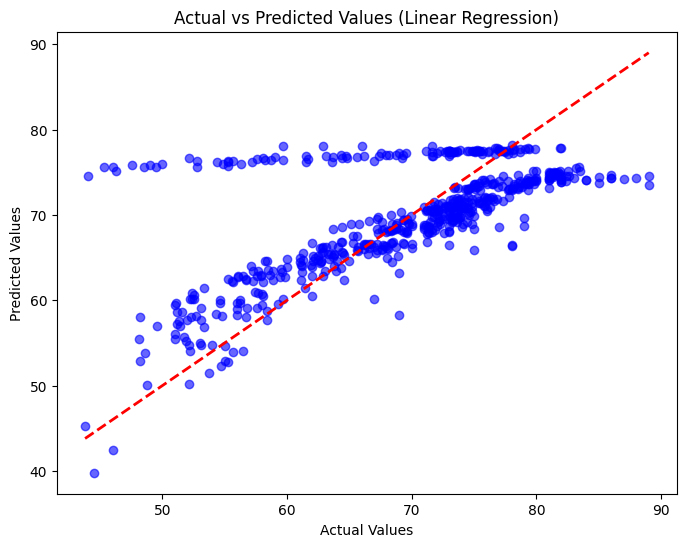

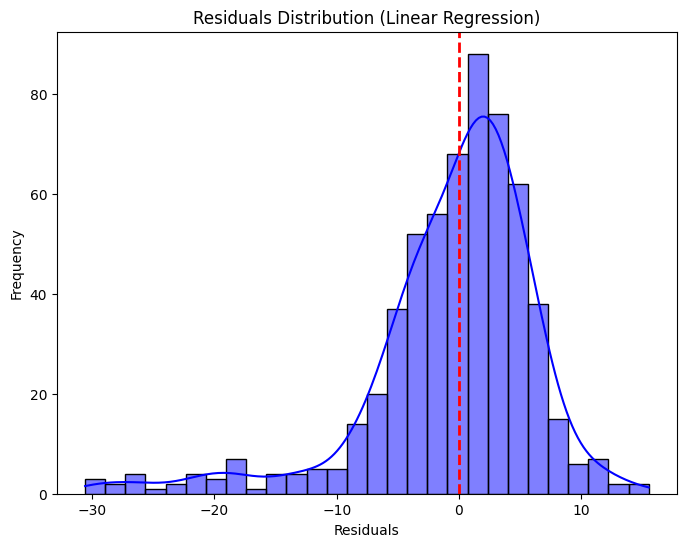

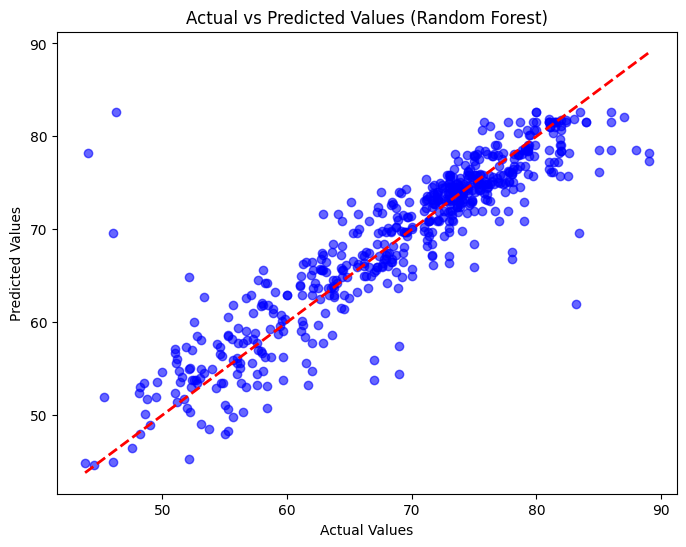

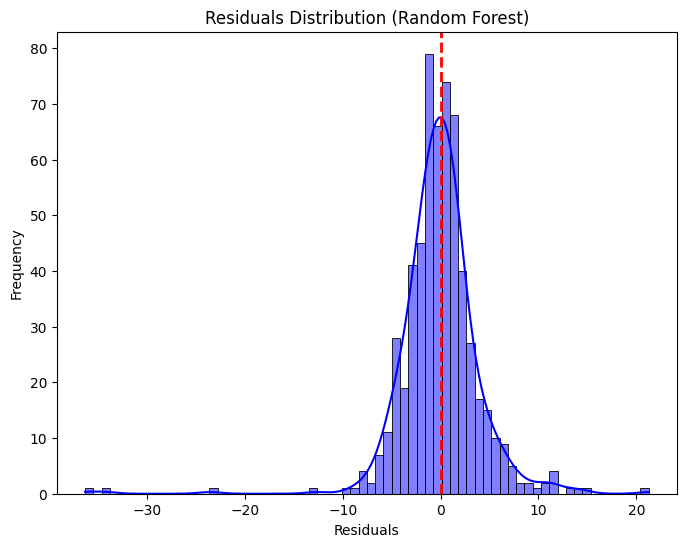

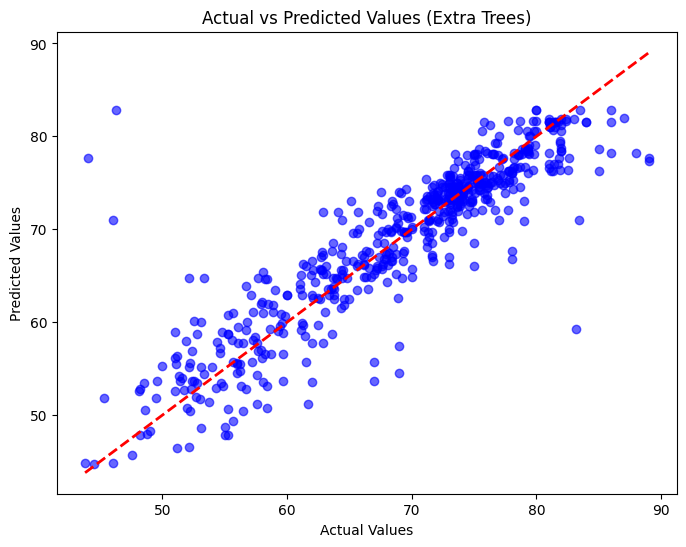

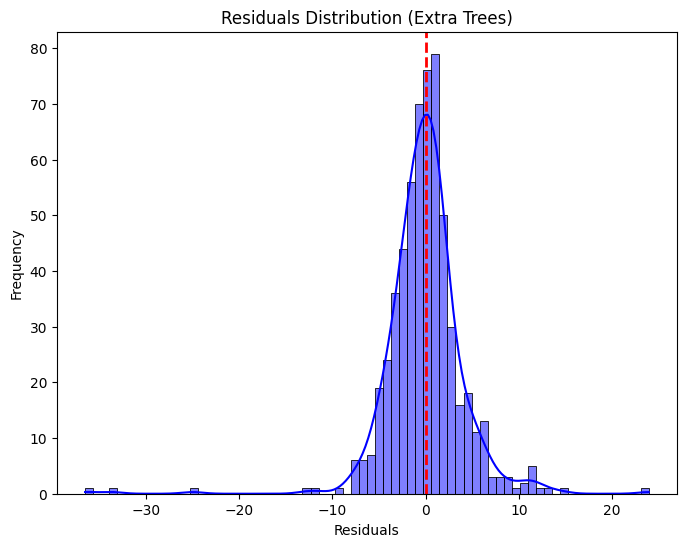

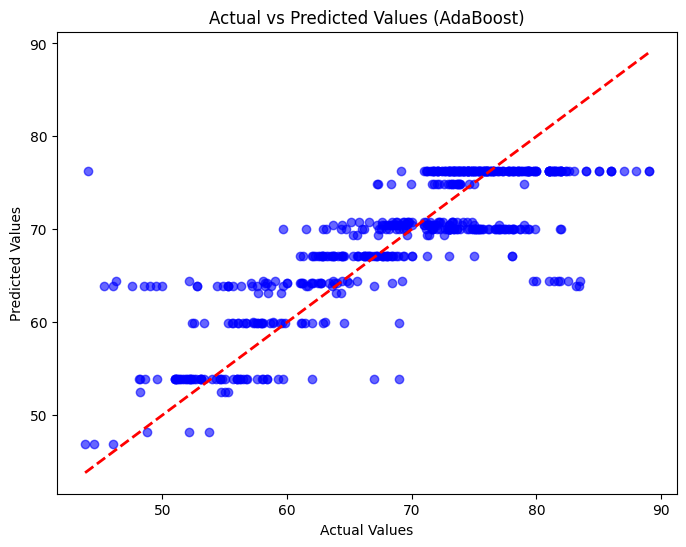

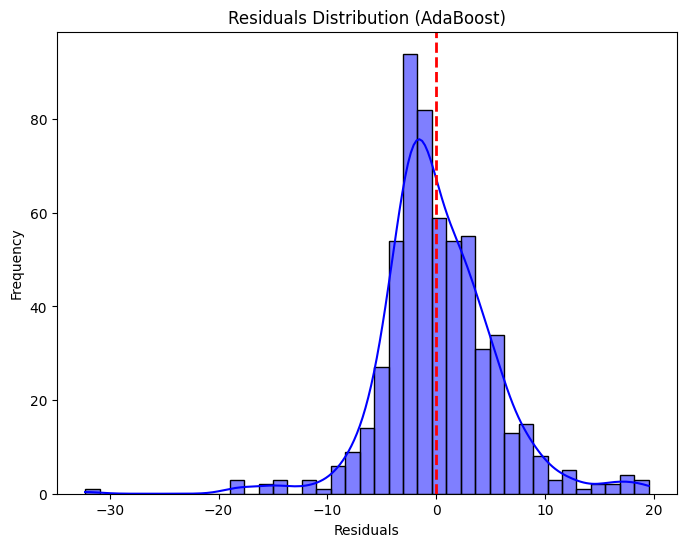

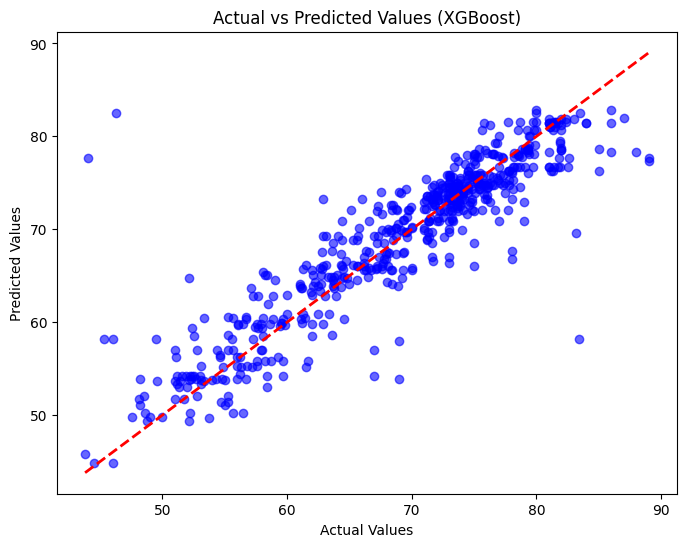

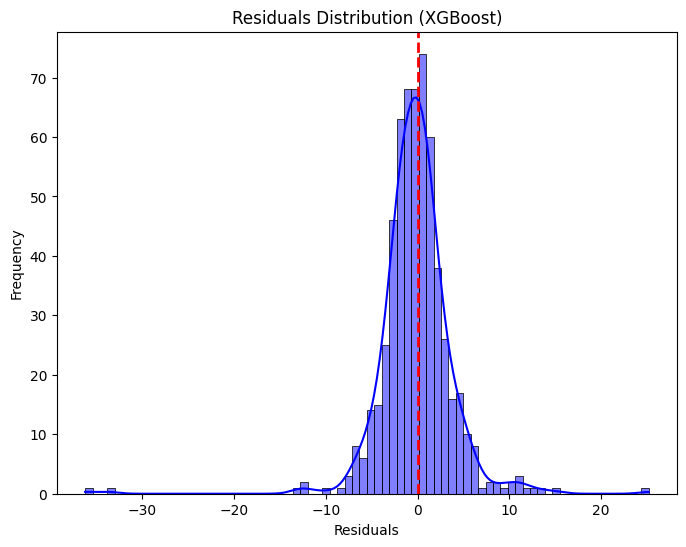

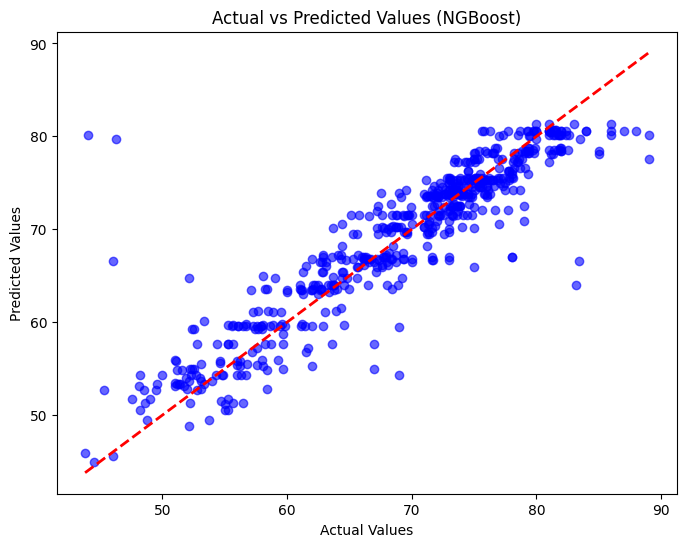

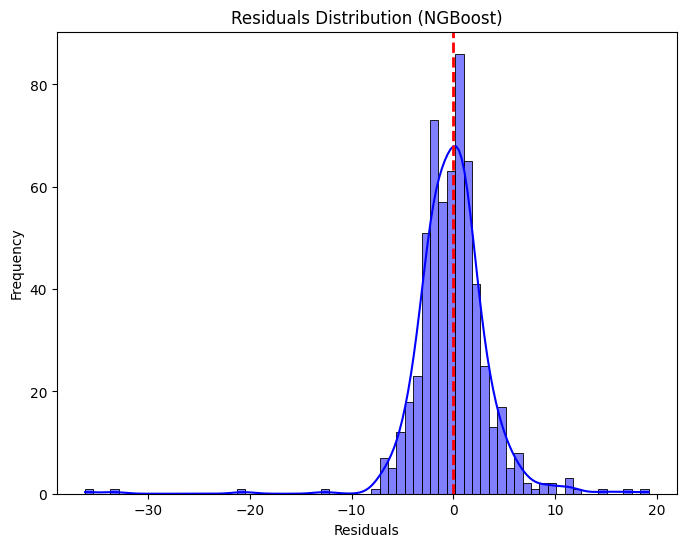

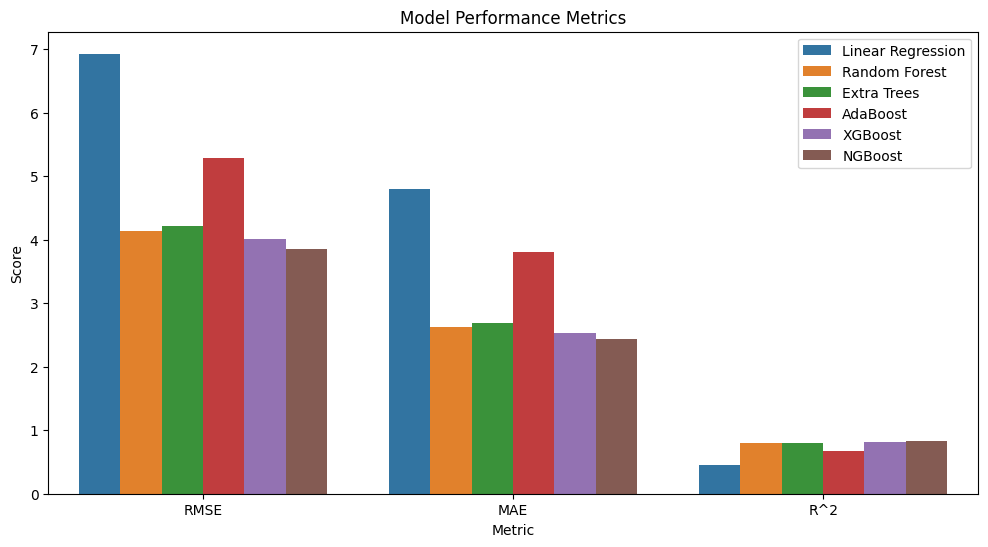

In [ ]:
# Visulatisation of regression

# function to plot actual values vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values ({model_name})')
    plt.show()

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue')
    plt.axvline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Distribution ({model_name})')
    plt.show()

# Plot metrics comparison (bar plot)
def plot_metrics_comparison(results_df):
    metrics_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=metrics_df, x='Metric', y='Score', hue='Model')
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.legend(loc='upper right')
    plt.show()

# Visualize for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test, y_pred, model_name)
    plot_residuals(y_test, y_pred, model_name)

# Visualize overall metrics
plot_metrics_comparison(results_df)


# **3. CLUSTERING**

For clustering, we focused on finding similarities between countries based on their numerical attributes, without any predefined labels.

# **3.1 PREPROCESSING**

We started by preprocessing the data, handling missing values by imputing them with the mean of each column. We then applied Z-score normalization to standardize the numerical features.

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Handle missing values by filling with column mean
numerical_data = numerical_data.apply(lambda col: col.fillna(col.mean()), axis=0)

# Z-score normalization (standardization)
scaler = StandardScaler()
z_score_data = scaler.fit_transform(numerical_data)

methods = {
    'K-Means': lambda data: KMeans(n_clusters=3, random_state=42).fit(data),
    'GMM': lambda data: GaussianMixture(n_components=3, random_state=42).fit(data),
    'K-Medoids': lambda data: KMedoids(n_clusters=3, random_state=42).fit(data),
}

# **3.2 FUNCTIONS**

Here, we defined important functions including the different metrics such as Dunn's index, BetaCV etc.

In [ ]:
# Dunn's Index

def dunn_index(data, labels):
    clusters = [data[labels == k] for k in np.unique(labels)]

    # Calculate intra-cluster diameters (maximum pairwise distance within each cluster)
    intra_cluster_diameters = [np.max(pdist(cluster)) if len(cluster) > 1 else 0 for cluster in clusters]

    # Calculate inter-cluster distances (minimum distance between any two points from different clusters)
    inter_cluster_distances = np.inf  # Start with infinity as a minimum distance
    for i, c1 in enumerate(clusters):
        for c2 in clusters[i + 1:]:
            # Minimum pairwise distance between clusters c1 and c2
            inter_cluster_distances = min(inter_cluster_distances, np.min(cdist(c1, c2)))

    # Return Dunn Index: minimum inter-cluster distance divided by maximum intra-cluster diameter
    if len(intra_cluster_diameters) == 0:  # No valid intra-cluster diameters
        print("No valid intra-cluster diameters found.")
        return None

    return inter_cluster_distances / np.max(intra_cluster_diameters)

In [ ]:
# BetaCV

def compute_betacv(data, labels, centroids):
    intra_cluster_variance = np.mean([np.var(data[labels == k], axis=0) for k in np.unique(labels)])
    inter_cluster_variance = np.mean([np.linalg.norm(centroids[k] - centroids[j]) for k in range(len(centroids)) for j in range(k+1, len(centroids))])
    return intra_cluster_variance / inter_cluster_variance


In [ ]:
# Cluster Distribution

def plot_cluster_distribution(data, labels, title, centroids=None):
    reduced_data = reduce_dimensionality(data)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f"{title} - Cluster Distribution")
    plt.legend()
    plt.show()

In [ ]:
# Silhouette Score

def plot_silhouette(data, labels, title):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower, y_upper = 0, 0
    y_ticks = []

    for i in range(np.unique(labels).size):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
        y_lower += len(cluster_silhouette_vals)
        y_ticks.append((y_lower + y_upper) / 2)

    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.yticks(y_ticks, np.unique(labels))
    plt.title(f"Silhouette Plot - {title}")
    plt.xlabel("Silhouette coefficient")
    plt.ylabel("Cluster")
    plt.show()



In [ ]:
# Function to calculate and plot SSE
def plot_sse(data, labels, centroids, title):
    sse = 0
    for i in range(len(data)):
        sse += np.sum((data[i] - centroids[labels[i]])**2)  # Index centroids with labels[i]
    plt.figure(figsize=(8, 6))
    plt.bar([title], [sse], color='blue')
    plt.title(f"SSE - {title}")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.show()

# Function to plot BetaCV
def plot_beta_cv(data, labels, centroids, title):
    beta_cv = compute_betacv(data, labels, centroids)
    plt.figure(figsize=(8, 6))
    plt.bar([title], [beta_cv], color='green')
    plt.title(f"BetaCV - {title}")
    plt.ylabel("Beta Coefficient of Variation (BetaCV)")
    plt.show()

# Function to plot Dunn Index
def plot_dunn_index(data, labels, title):
    dunn = dunn_index(data, labels)
    plt.figure(figsize=(8, 6))
    plt.bar([title], [dunn], color='red')
    plt.title(f"Dunn Index - {title}")
    plt.ylabel("Dunn Index")
    plt.show()

In [ ]:
# Elbow method to calculate k

def plot_elbow(data, max_k=10, title="Elbow Method"):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE")
    plt.grid()
    plt.show()

In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label='Cluster')
    plt.grid()
    plt.show()

In [ ]:
# For plotting scores

def reduce_dimensionality(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

# **3.3 CLUSTERING MODELS**

We applied different clustering techniques, such as K-Means, Gaussian Mixture Models (GMM), and K-Medoids, to group countries based on similarities in their numerical attributes.

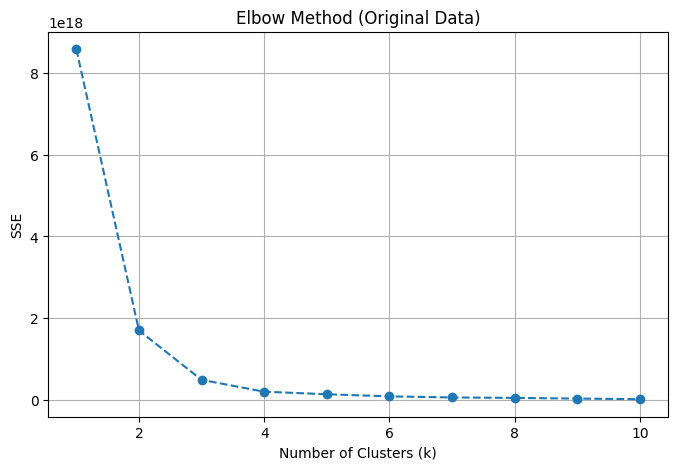

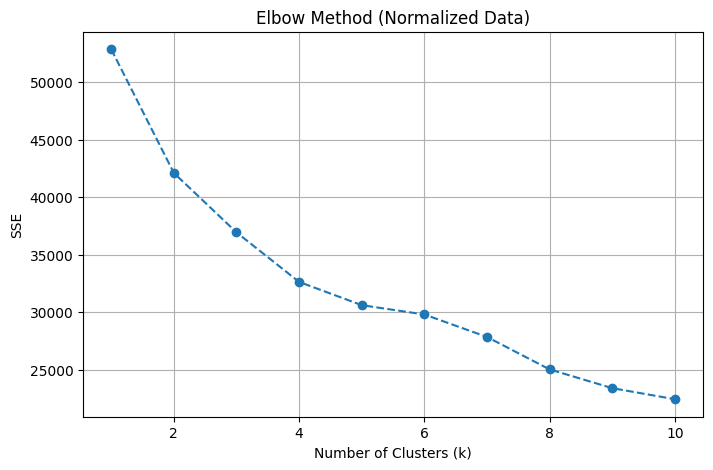

In [ ]:
# Plotting elbow to find k

plot_elbow(numerical_data, title="Elbow Method (Original Data)")
plot_elbow(z_score_data, title="Elbow Method (Normalized Data)")

In [ ]:
# Applying K-Means Clustering
k = 4  # Number of clusters from elbow method
kmeans_original = KMeans(n_clusters=k, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(numerical_data)  # Using original data

# Applying GMM (Gaussian Mixture Model) Clustering
gmm_original = GaussianMixture(n_components=k, random_state=42)
gmm_labels_original = gmm_original.fit_predict(numerical_data)

# Applying K-Medoids Clustering
kmedoids_original = KMedoids(n_clusters=k, random_state=42)
kmedoids_labels_original = kmedoids_original.fit_predict(numerical_data)

In [ ]:
# Normalized data

# K-Means on normalized data
kmeans_normalized = KMeans(n_clusters=k, random_state=42)
kmeans_labels_normalized = kmeans_normalized.fit_predict(z_score_data)

# GMM on normalized data
gmm_normalized = GaussianMixture(n_components=k, random_state=42)
gmm_labels_normalized = gmm_normalized.fit_predict(z_score_data)

# K-Medoids on normalized data
kmedoids_normalized = KMedoids(n_clusters=k, random_state=42)
kmedoids_labels_normalized = kmedoids_normalized.fit_predict(z_score_data)

In [ ]:
# SSE (Sum of Squared Errors)
sse_kmeans_original = np.sum((numerical_data.values - kmeans_original.cluster_centers_[kmeans_labels_original])**2)
sse_kmedoids_original = np.sum((numerical_data.values - kmedoids_original.cluster_centers_[kmedoids_labels_original])**2)
sse_kmeans_normalized = np.sum((z_score_data - kmeans_normalized.cluster_centers_[kmeans_labels_normalized])**2)
sse_kmedoids_normalized = np.sum((z_score_data - kmedoids_normalized.cluster_centers_[kmedoids_labels_normalized])**2)

# Silhouette Score
silhouette_kmeans_original = silhouette_score(numerical_data, kmeans_labels_original)
silhouette_gmm_original = silhouette_score(numerical_data, gmm_labels_original)
silhouette_kmedoids_original = silhouette_score(numerical_data, kmedoids_labels_original)

silhouette_kmeans_normalized = silhouette_score(z_score_data, kmeans_labels_normalized)
silhouette_gmm_normalized = silhouette_score(z_score_data, gmm_labels_normalized)
silhouette_kmedoids_normalized = silhouette_score(z_score_data, kmedoids_labels_normalized)

# Dunn Index
dunn_kmeans_original = dunn_index(numerical_data.values, kmeans_labels_original)
dunn_kmedoids_original = dunn_index(numerical_data.values, kmedoids_labels_original)

dunn_kmeans_normalized = dunn_index(z_score_data, kmeans_labels_normalized)
dunn_kmedoids_normalized = dunn_index(z_score_data, kmedoids_labels_normalized)

# BetaCV
beta_cv_kmeans_original = compute_betacv(numerical_data.values, kmeans_labels_original, kmeans_original.cluster_centers_)
beta_cv_kmedoids_original = compute_betacv(numerical_data.values, kmedoids_labels_original, kmedoids_original.cluster_centers_)

beta_cv_kmeans_normalized = compute_betacv(z_score_data, kmeans_labels_normalized, kmeans_normalized.cluster_centers_)
beta_cv_kmedoids_normalized = compute_betacv(z_score_data, kmedoids_labels_normalized, kmedoids_normalized.cluster_centers_)

In [ ]:
results_comparison = {
    'Metric': ['SSE', 'Silhouette', 'Dunn Index', 'BetaCV'],
    'K-Means (Original)': [sse_kmeans_original, silhouette_kmeans_original, dunn_kmeans_original, beta_cv_kmeans_original],
    'K-Means (Normalized)': [sse_kmeans_normalized, silhouette_kmeans_normalized, dunn_kmeans_normalized, beta_cv_kmeans_normalized],
    'GMM (Original)': [None, silhouette_gmm_original, None, None],  # GMM does not have SSE, Dunn, or BetaCV directly
    'GMM (Normalized)': [None, silhouette_gmm_normalized, None, None],
    'K-Medoids (Original)': [sse_kmedoids_original, silhouette_kmedoids_original, dunn_kmedoids_original, beta_cv_kmedoids_original],
    'K-Medoids (Normalized)': [sse_kmedoids_normalized, silhouette_kmedoids_normalized, dunn_kmedoids_normalized, beta_cv_kmedoids_normalized]
}

results_df = pd.DataFrame(results_comparison)
print(results_df)

       Metric  K-Means (Original)  K-Means (Normalized)  GMM (Original)  \
0         SSE        2.099092e+17          32643.727517             NaN   
1  Silhouette        8.673070e-01              0.245010       -0.007027   
2  Dunn Index        1.876350e-03              0.013979             NaN   
3      BetaCV        1.242694e+05              0.231502             NaN   

   GMM (Normalized)  K-Medoids (Original)  K-Medoids (Normalized)  
0               NaN          7.311205e+18            40695.483885  
1           0.05194          1.889721e-02                0.055296  
2               NaN          2.199294e-06                0.008099  
3               NaN          1.655643e+07                0.216515  


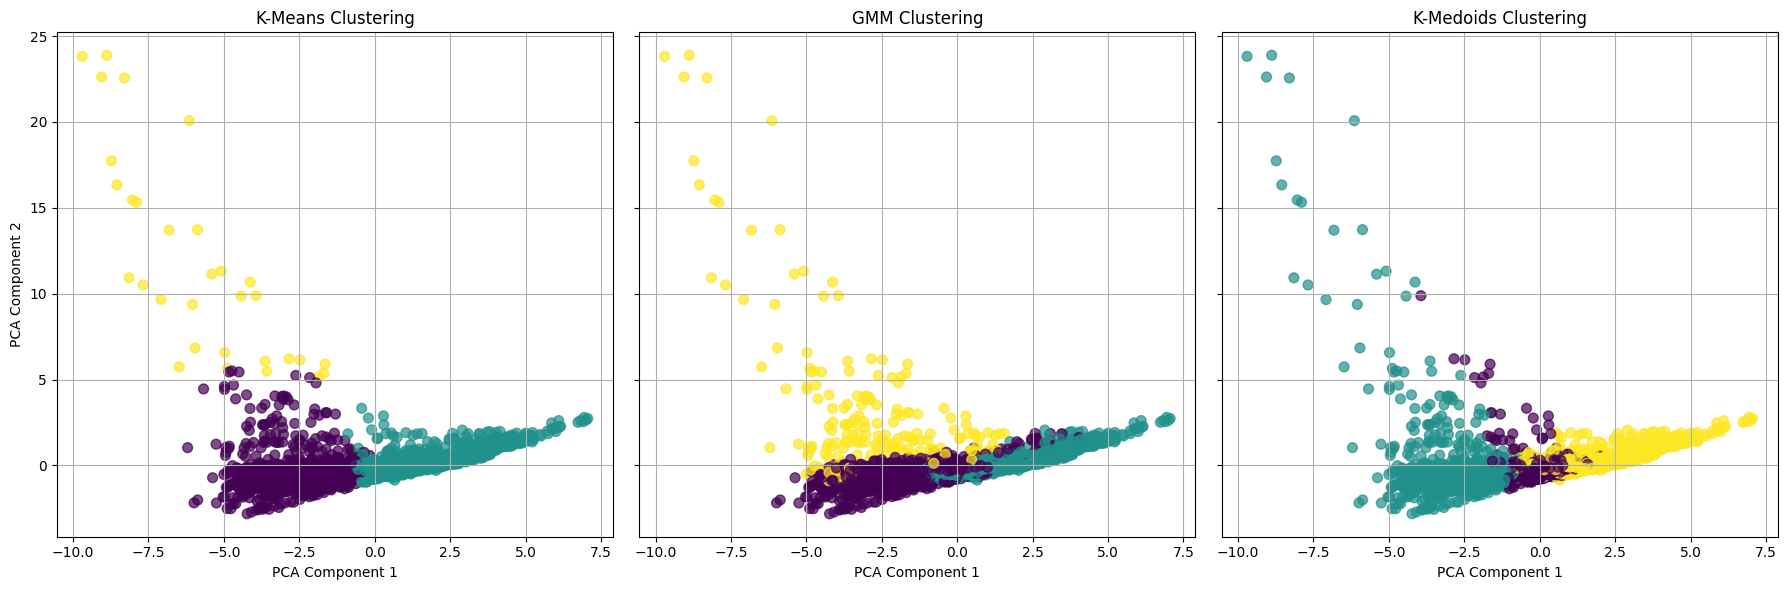

In [ ]:
from sklearn.decomposition import PCA

# Step 2: Apply clustering methods and visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(z_score_data)  # Reduce to 2D for visualization

for i, (method_name, method_func) in enumerate(methods.items()):
    # Apply clustering
    model = method_func(z_score_data)

    # Get cluster labels
    if hasattr(model, 'predict'):  # GMM and K-Means
        labels = model.predict(z_score_data)
    else:  # K-Medoids
        labels = model.labels_

    # Plot the clusters
    axes[i].scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    axes[i].set_title(f"{method_name} Clustering")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2" if i == 0 else "")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


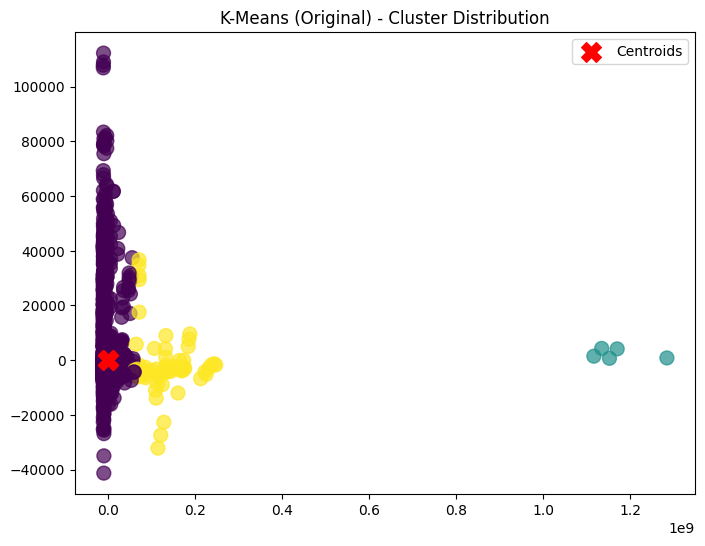

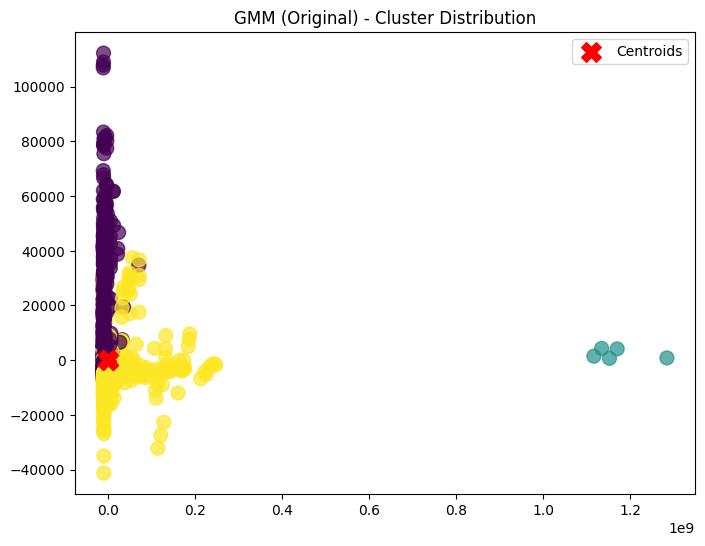

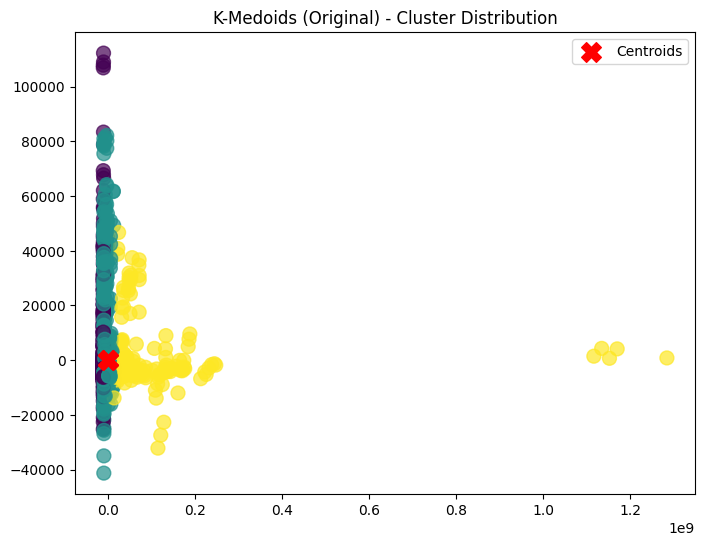

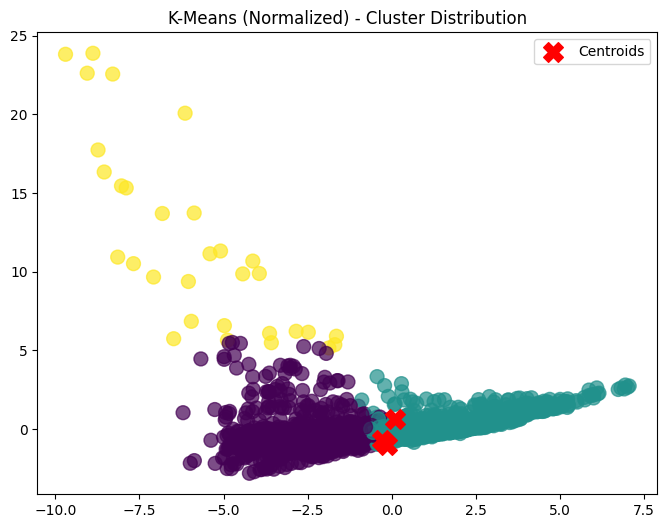

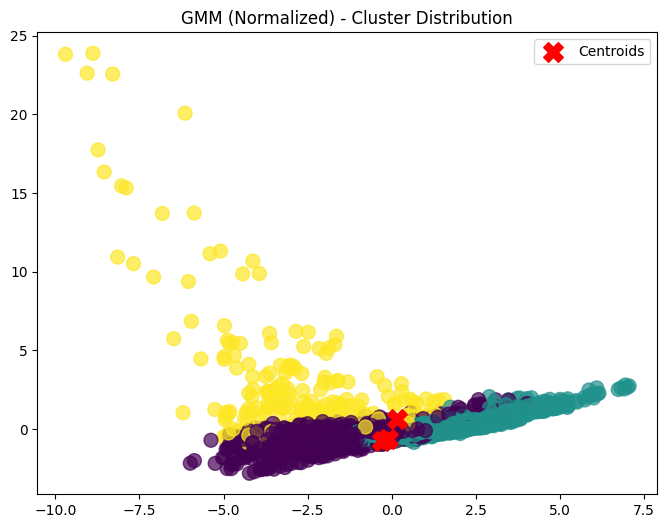

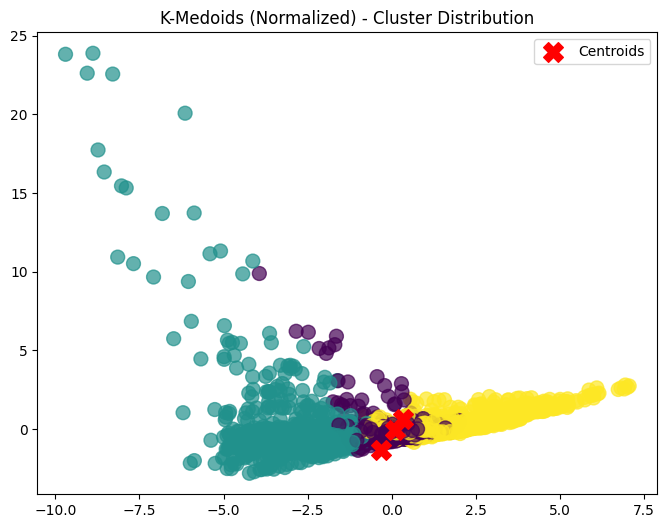

In [ ]:
for dataset_name, dataset in [('Original', numerical_data), ('Normalized', z_score_data)]:
    for method_name, method in methods.items():
        if method_name == 'GMM':  # GMM requires .predict()
            model = method(dataset)
            labels = model.predict(dataset)
            centroids = model.means_  # GMM doesn't provide explicit centroids, use means as cluster centers
        else:
            model = method(dataset)
            labels = model.labels_
            centroids = model.cluster_centers_ if hasattr(model, 'cluster_centers_') else None

        # Visualize Results for each clustering method:
        # Cluster Distribution
        plot_cluster_distribution(dataset, labels, f"{method_name} ({dataset_name})", centroids)